<h2 style = "color : Brown"> TIMELINE ANALYSIS : COVID-19 </h2>
Created by : Nurshafizah Binti Mohd Kamil

#### OBJECTIVE:
- [X] Create a storyboard showing spread of Covid-19 cases in your country or any region
- [X] Use animation, timeline and annotations to create attractive and interactive dashboards and story
- [X] Identify interesting patterns and possible reasons helping Covid-19 spread with basic as well as advance charts

#### Note - Public data used from the site as off 7th May 2022.

In [1]:
# Importing the requires libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Displaying all columns

from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# Surpress warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset

covid = pd.read_csv('owid-covid-data.csv')
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
# Checking the number of rows and columns in the dataframe

covid.shape

(184510, 67)

In [5]:
# Checking the data types and the column-wise info in the data frame

covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184510 entries, 0 to 184509
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    184510 non-null  object 
 1   continent                                   173735 non-null  object 
 2   location                                    184510 non-null  object 
 3   date                                        184510 non-null  object 
 4   total_cases                                 177657 non-null  float64
 5   new_cases                                   177420 non-null  float64
 6   new_cases_smoothed                          176251 non-null  float64
 7   total_deaths                                159355 non-null  float64
 8   new_deaths                                  159336 non-null  float64
 9   new_deaths_smoothed                         158179 non-null  float64
 

In [6]:
# Changing the data types for dates

covid['date'] = pd.to_datetime(covid['date'])
covid['date'].dtypes

dtype('<M8[ns]')

In [7]:
# Checking the numeric columns in the dataframe

covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.776570e+05,1.774200e+05,1.762510e+05,1.593550e+05,159336.000000,158179.000000,176836.00000,176599.000000,175435.000000,158547.000000,158528.000000,157376.000000,137656.000000,24042.000000,24042.000000,25329.000000,25329.000000,5972.000000,5972.000000,11958.000000,11958.000000,7.562700e+04,7.279300e+04,75627.000000,72793.000000,9.663300e+04,96633.000000,93243.000000,9.164800e+04,5.027900e+04,4.781100e+04,4.533400e+04,2.262100e+04,4.127300e+04,9.820400e+04,50279.000000,47811.000000,45334.000000,22621.000000,98204.000000,9.718800e+04,97188.000000,143794.000000,1.833720e+05,164363.000000,152325.000000,150704.000000,151523.000000,151962.000000,99250.000000,151992.000000,159431.000000,115326.000000,113745.000000,74912.000000,134815.000000,172506.000000,148518.000000,6.359000e+03,6359.000000,6359.000000,6359.000000
mean,3.070704e+06,1.241720e+04,1.245604e+04,6.273198e+04,162.610019,163.572895,37857.14000,183.303917,183.098140,565.279374,1.623286,1.624219,0.977618,924.753473,24.237424,4358.631608,171.034536,464.248158,14.904999,5793.721191,103.704738,1.936231e+07,6.704373e+04,851.556123,3.257497,1.506382e+05,2.892613,0.100837,2.468785e+03,2.098406e+08,1.036680e+08,8.487026e+07,3.201683e+07,1.148302e+06,4.835096e+05,82.229221,41.080574,35.873191,16.345848,3064.947283,1.901219e+05,0.133293,53.501198,1.437908e+08,459.201323,30.646504,8.834639,5.572634,19644.050712,13.590622,260.413436,8.377913,10.646334,32.788996,50.946221,3.032695,73.653929,0.725307,3.930037e+04,9.624487,15.721005,1075.789054
std,1.921120e+07,8.815879e+04,8.658912e+04,3.275512e+05,803.604436,786.749001,70253.69786,764.944782,576.353979,849.008558,5.231222,3.554325,0.368904,2648.584656,27.765707,11562.636485,207.103074,618.681146,16.075070,14139.771491,104.673276,7.937460e+07,2.506002e+05,2071.062202,9.047257,1.179912e+06,7.482341,0.123235,3.393007e+04,9.177170e+08,4.519889e+08,3.857748e+08,1.455762e+08,4.239944e+06,2.652534e+06,69.847916,29.611628,28.660914,20.160565,3829.358297,1.094458e+06,0.232878,20.612705,6.968425e+08,2117.336336,9.080888,6.150741,4.177964,20582.055964,20.020307,120.082376,4.688775,10.584031,13.526827,31.860953,2.449884,7.461123,0.149741,1.099822e+05,16.028028,29.110422,1529.209825
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.00100,0.000000,0.000000,0.000000,0.000000,0.000000,-0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0

In [8]:
# Surpressing the scientific notation for better reading

covid.describe().T.apply(lambda s: s.apply('{0:.5f}'.format))

,count,mean,std,min,25%,50%,75%,max
total_cases,177657.00000,3070704.03789,19211196.85074,1.00000,2492.00000,33005.00000,357658.00000,517097886.00000
new_cases,177420.00000,12417.19695,88158.79235,0.00000,0.00000,74.50000,1055.00000,4089131.00000
new_cases_smoothed,176251.00000,12456.04259,86589.12438,0.00000,6.71400,103.85700,1159.85700,3437057.00000
total_deaths,159355.00000,62731.98110,327551.19711,1.00000,90.00000,869.00000,8174.00000,6250664.00000
new_deaths,159336.00000,162.61002,803.60444,0.00000,0.00000,1.00000,18.00000,18144.00000
new_deaths_smoothed,158179.00000,163.57289,786.74900,0.00000,0.14300,2.28600,20.14300,14783.28600
total_cases_per_million,176836.00000,37857.14000,70253.69786,0.00100,725.95300,5850.47800,47253.58875,706541.90400
new_cases_per_million,176599.00000,183.30392,764.94478,0.00000,0.00000,10.80100,103.07000,55272.10900
new_cases_smoothed_per_million,175435.00000,183.09814,576.35398,0.00000,1.54900,19.18100,127.54400,16052.60800
total_deaths_per_million,158547.00000,565.27937,849.00856,0.00000,21.58100,154.66000,809.54200,6382.99600


In [9]:
# Listing of all the numerical columns

list(covid.describe().columns)

['total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_hundred',

In [10]:
# Data provided in the dataset are from 01-01-2020 to 07-05-2022

covid.date.min(), covid.date.max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2022-05-07 00:00:00'))

In [11]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184510 entries, 0 to 184509
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    184510 non-null  object        
 1   continent                                   173735 non-null  object        
 2   location                                    184510 non-null  object        
 3   date                                        184510 non-null  datetime64[ns]
 4   total_cases                                 177657 non-null  float64       
 5   new_cases                                   177420 non-null  float64       
 6   new_cases_smoothed                          176251 non-null  float64       
 7   total_deaths                                159355 non-null  float64       
 8   new_deaths                                  159336 non-null  float64      

#### Dropping the unnecessary and redundant column

In [12]:
drop_col = ['icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million','weekly_icu_admissions',
            'weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million',
            'human_development_index','excess_mortality_cumulative_absolute','excess_mortality_cumulative','excess_mortality',
            'excess_mortality_cumulative_per_million','handwashing_facilities',
            'reproduction_rate','extreme_poverty']

covid.drop(columns=drop_col,axis=1,inplace=True)

In [13]:
covid.shape

(184510, 51)

#### Analysing the Null Values

In [14]:
# Checking the null values present in the dataset

covid.isnull().sum()

iso_code                                           0
continent                                      10775
location                                           0
date                                               0
total_cases                                     6853
new_cases                                       7090
new_cases_smoothed                              8259
total_deaths                                   25155
new_deaths                                     25174
new_deaths_smoothed                            26331
total_cases_per_million                         7674
new_cases_per_million                           7911
new_cases_smoothed_per_million                  9075
total_deaths_per_million                       25963
new_deaths_per_million                         25982
new_deaths_smoothed_per_million                27134
total_tests                                   108883
new_tests                                     111717
total_tests_per_thousand                      

In [15]:
# Percentage of the Null values

null_percentage =round(covid.isna().sum()/len(covid)*100,2)
null_percentage.sort_values(ascending=False).head(30)

total_boosters_per_hundred                    87.74
total_boosters                                87.74
new_vaccinations                              77.63
people_fully_vaccinated_per_hundred           75.43
people_fully_vaccinated                       75.43
people_vaccinated_per_hundred                 74.09
people_vaccinated                             74.09
total_vaccinations                            72.75
total_vaccinations_per_hundred                72.75
new_tests                                     60.55
new_tests_per_thousand                        60.55
total_tests                                   59.01
total_tests_per_thousand                      59.01
tests_per_case                                50.33
positive_rate                                 49.46
new_tests_smoothed                            47.63
new_tests_smoothed_per_thousand               47.63
new_people_vaccinated_smoothed_per_hundred    47.33
new_people_vaccinated_smoothed                47.33
new_vaccinat

In [16]:
# Checking Duplicates value

covid.duplicated().sum()

0

In [17]:
# Analysing the unique value

covid.nunique().sort_values()

tests_units                                        4
continent                                          6
hospital_beds_per_thousand                       101
female_smokers                                   112
male_smokers                                     127
median_age                                       138
diabetes_prevalence                              150
stringency_index                                 179
aged_70_older                                    190
aged_65_older                                    191
cardiovasc_death_rate                            194
gdp_per_capita                                   196
life_expectancy                                  212
population_density                               212
population                                       241
iso_code                                         243
location                                         243
date                                             858
new_people_vaccinated_smoothed_per_hundred    

In [18]:
# Categorical Columns

covid_categorical = covid.select_dtypes(exclude=['float64', 'int64', 'datetime64'])
covid_categorical.columns

Index(['iso_code', 'continent', 'location', 'tests_units'], dtype='object')

In [19]:
# Numerical Columns

covid_numerical = covid.select_dtypes(exclude=['object','datetime64'])
covid_numerical.columns

Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population', 'populat

#### Numerical Variables

In [20]:
covid_numerical.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
total_cases,1.000000,0.785814,0.811008,0.950006,0.626676,0.649005,0.101502,0.028720,0.039567,0.123854,0.011175,0.017433,0.844282,0.611433,0.088251,0.019866,0.093589,0.024728,0.068800,-0.017942,0.834495,0.843632,0.835102,0.768545,0.661991,0.669905,0.119467,0.116002,0.094201,-0.024431,0.014748,0.568425,-0.016797,0.024422,0.616924,-0.016621,0.033566,0.032299,0.030065,0.012723,-0.037147,0.006975,-0.000453,-0.005204,-0.001512,0.015062
new_cases,0.785814,1.000000,0.977800,0.743029,0.656534,0.646344,0.083829,0.087718,0.101022,0.088215,0.031675,0.038480,0.453198,0.545266,0.074191,0.072038,0.081567,0.076177,0.176317,-0.015594,0.622927,0.619806,0.625385,0.603866,0.506876,0.514184,0.100927,0.082971,0.080703,0.029697,0.013081,0.399023,-0.025383,0.048857,0.527349,-0.014723,0.039285,0.039638,0.038439,0.016888,-0.039995,0.001904,0.005458,0.000921,0.012562,0.020617
new_cases_smoothed,0.811008,0.977800,1.000000,0.760523,0.649734,0.663068,0.087782,0.077366,0.103457,0.090838,0.028541,0.040756,0.481816,0.554305,0.079220,0.068252,0.085751,0.078397,0.188690,-0.016412,0.639347,0.634869,0.641310,0.630924,0.502601,0.519789,0.103753,0.084749,0.082310,0.033773,0.011623,0.403426,-0.026225,0.050368,0.538796,-0.015001,0.039875,0.040211,0.038963,0.017083,-0.040618,0.002012,0.005445,0.000980,0.012659,0.020891
total_deaths,0.950006,0.743029,0.760523,1.000000,0.735097,0.759149,0.060078,0.009115,0.012366,0.139099,0.017113,0.026243,0.751571,0.593805,0.027490,-0.007629,0.081858,-0.009564,0.094696,-0.018805,0.814246,0.839328,0.811561,0.633964,0.750830,0.760872,0.073889,0.081254,0.048837,-0.114613,0.037851,0.674499,0.004197,0.046314,0.687244,-0.020115,0.031399,0.026883,0.024331,0.005353,-0.038105,0.015361,-0.007262,-0.003040,-0.007854,0.015769
new_deaths,0.626676,0.656534,0.649734,0.735097,1.000000,0.975049,-0.000873,0.009052,0.008095,0.057940,0.071020,0.085366,0.388617,0.508479,-0.028592,-0.014486,0.066316,-0.015134,0.177670,-0.020374,0.460769,0.488761,0.440831,0.259935,0.630304,0.645551,-0.079663,-0.093735,-0.111646,-0.177063,0.013365,0.629802,0.008233,0.130577,0.732617,-0.021561,0.035647,0.030320,0.027391,0.005522,-0.035846,0.016569,-0.006831,0.004065,-0.002933,0.016017
new_deaths_smoothed,0.649005,0.646344,0.663068,0.759149,0.975049,1.000000,-0.000210,0.004686,0.007306,0.060529,0.060332,0.087698,0.418194,0.510773,-0.029910,-0.020213,0.070163,-0.016829,0.182114,-0.021780,0.478096,0.506798,0.457428,0.273953,0.637566,0.665742,-0.080726,-0.094993,-0.114032,-0.181695,0.014728,0.648405,0.009393,0.139063,0.752523,-0.022092,0.036470,0.031011,0.028005,0.005605,-0.036645,0.017040,-0.006974,0.004242,-0.002979,0.016381
total_cases_per_million,0.101502,0.083829,0.087782,0.060078,-0.000873,-0.000210,1.000000,0.395138,0.543628,0.650603,0.151635,0.228972,0.203058,0.119328,0.588303,0.312807,-0.029891,0.341581,0.261239,-0.047034,-0.056631,-0.057388,-0.051490,-0.025453,-0.133469,-0.060534,0.567486,0.503508,0.527126,0.649995,0.004460,-0.066334,-0.108986,-0.164039,-0.051269,0.007836,0.371885,0.352187,0.349851,0.269943,-0.176911,0.036885,0

In [21]:
# Checking the correlation between variables

covid_numerical.corr().unstack().sort_values(ascending=False).drop_duplicates()

total_cases                                 total_cases                                   1.000000
aged_70_older                               aged_65_older                                 0.994090
total_vaccinations                          people_vaccinated                             0.993736
                                            people_fully_vaccinated                       0.992105
people_fully_vaccinated                     people_vaccinated                             0.985200
new_vaccinations                            new_vaccinations_smoothed                     0.982888
new_cases_smoothed                          new_cases                                     0.977800
total_vaccinations_per_hundred              people_fully_vaccinated_per_hundred           0.976818
new_deaths_smoothed                         new_deaths                                    0.975049
people_fully_vaccinated_per_hundred         people_vaccinated_per_hundred                 0.970133
total_vacc

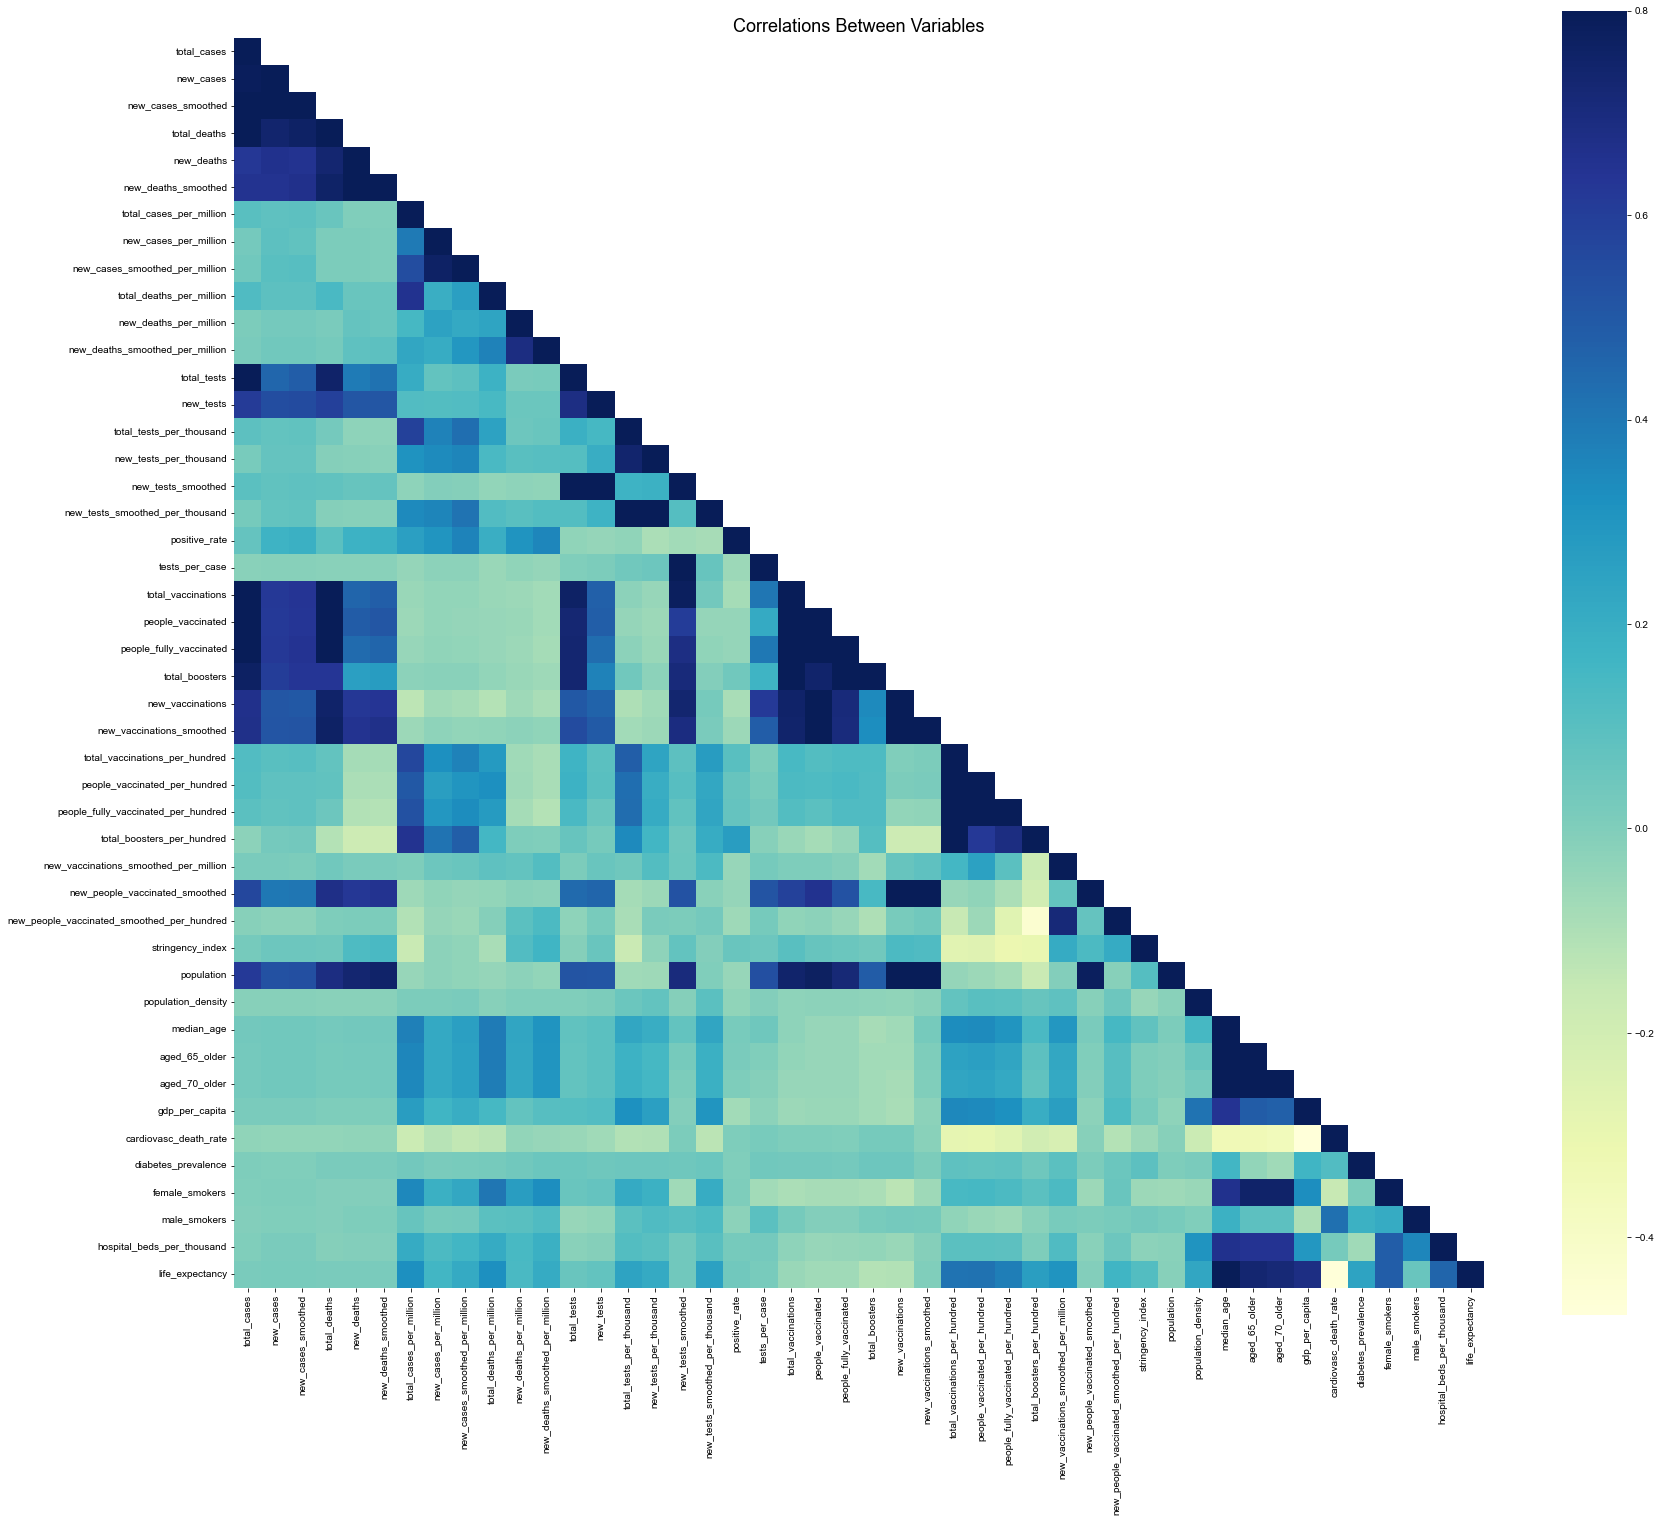

In [22]:
# Plotting heatmap to check on the correlation coefficients

plt.figure(figsize=(28,24))
mask = np.array(covid_numerical.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(covid_numerical.corr(), mask = mask, vmax = .8, square =  True, annot=False, cmap='YlGnBu', fmt=".2f")

sns.set_style('whitegrid')
sns.set_context('talk')
plt.title('Correlations Between Variables')
plt.show()

In [23]:
# Total columns of the numerical columns

len(covid_numerical.columns)


46

In [24]:
# Data types of the numerical columns

covid_numerical.dtypes

total_cases                                   float64
new_cases                                     float64
new_cases_smoothed                            float64
total_deaths                                  float64
new_deaths                                    float64
new_deaths_smoothed                           float64
total_cases_per_million                       float64
new_cases_per_million                         float64
new_cases_smoothed_per_million                float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
new_deaths_smoothed_per_million               float64
total_tests                                   float64
new_tests                                     float64
total_tests_per_thousand                      float64
new_tests_per_thousand                        float64
new_tests_smoothed                            float64
new_tests_smoothed_per_thousand               float64
positive_rate               

#### Categorical Columns

In [25]:
# List of columns for the categorical

covid_categorical.columns

Index(['iso_code', 'continent', 'location', 'tests_units'], dtype='object')

In [32]:
import xlsxwriter

# Exporting the cleaned retail_datasets
writer = pd.ExcelWriter('Timeline Analysis2 - Covid 19.xlsx', engine='xlsxwriter')
covid.to_excel(writer, sheet_name='covid', index = False)

writer.save()
print("Cleaned Data Sets exported successfully.")

Cleaned Data Sets exported successfully.
